<a href="https://colab.research.google.com/github/SA9572/ML-Class-NLP-USL-/blob/main/12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Core libraries
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# Matplotlib settings
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True

print("Libraries imported successfully.")


Libraries imported successfully.


In [ ]:
# Set project root as the parent of the notebooks directory
CURRENT_DIR = Path.cwd()
PROJECT_ROOT = CURRENT_DIR.parent if CURRENT_DIR.name == "notebooks" else CURRENT_DIR

DATA_RAW_DIR = PROJECT_ROOT / "data" / "raw"
DATA_PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"
DATA_INTERIM_DIR = PROJECT_ROOT / "data" / "interim"

RAW_DATA_PATH = DATA_RAW_DIR / "india_housing_prices.csv"
PROCESSED_DATA_PATH = DATA_PROCESSED_DIR / "housing_processed.csv"

print("Current directory:", CURRENT_DIR)
print("Project root:", PROJECT_ROOT)
print("Raw data path:", RAW_DATA_PATH)
print("Processed data path:", PROCESSED_DATA_PATH)

# Create processed/interim dirs if not exist
DATA_PROCESSED_DIR.mkdir(parents=True, exist_ok=True)
DATA_INTERIM_DIR.mkdir(parents=True, exist_ok=True)


Current directory: /content
Project root: /content
Raw data path: /content/data/raw/india_housing_prices.csv
Processed data path: /content/data/processed/housing_processed.csv


In [ ]:
print("=== DataFrame Info ===")
df_raw.info()

print("\n=== Descriptive Statistics (Numeric) ===")
display(df_raw.describe().T)

print("\n=== Descriptive Statistics (Categorical) ===")
display(df_raw.describe(include="object").T)

# Separate numeric and categorical columns
numeric_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_raw.select_dtypes(include=["object", "category"]).columns.tolist()

print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")


=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64 

,count,mean,std,min,25%,50%,75%,max
ID,"250,000.00","125,000.50","72,168.93",1.00,"62,500.75","125,000.50","187,500.25","250,000.00"
BHK,"250,000.00",3.00,1.42,1.00,2.00,3.00,4.00,5.00
Size_in_SqFt,"250,000.00","2,749.81","1,300.61",500.00,"1,623.00","2,747.00","3,874.00","5,000.00"
Price_in_Lakhs,"250,000.00",254.59,141.35,10.00,132.55,253.87,376.88,500.00
Price_per_SqFt,"250,000.00",0.13,0.13,0.00,0.05,0.09,0.16,0.99
Year_Built,"250,000.00","2,006.52",9.81,"1,990.00","1,998.00","2,007.00","2,015.00","2,023.00"
Floor_No,"250,000.00",14.97,8.95,0.00,7.00,15.00,23.00,30.00
Total_Floors,"250,000.00",15.50,8.67,1.00,8.00,15.00,23.00,30.00
Age_of_Property,"250,000.00",18.48,9.81,2.00,10.00,18.00,27.00,35.00
Nearby_Schools,"250,000.00",5.50,2.88,1.00,3.00,5.00,8.00,10.00



=== Descriptive Statistics (Categorical) ===


,count,unique,top,freq
State,250000,20,Odisha,12681
City,250000,42,Coimbatore,6461
Locality,250000,500,Locality_296,567
Property_Type,250000,3,Villa,83744
Furnished_Status,250000,3,Unfurnished,83408
Public_Transport_Accessibility,250000,3,High,83705
Parking_Space,250000,2,No,125456
Security,250000,2,Yes,125233
Amenities,250000,325,Pool,10218
Facing,250000,4,West,62757


Numeric columns (11): ['ID', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals']
Categorical columns (12): ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']


In [ ]:
missing_counts = df_raw.isna().sum()
missing_percent = (missing_counts / len(df_raw)) * 100

missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_percent
}).sort_values(by="missing_percent", ascending=False)

print("=== Missing Values Summary ===")
missing_df[missing_df["missing_count"] > 0]


=== Missing Values Summary ===


,missing_count,missing_percent


In [ ]:
# Plot only if there are missing values
if missing_df["missing_count"].sum() > 0:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=missing_df[missing_df["missing_count"] > 0].index,
        y=missing_df[missing_df["missing_count"] > 0]["missing_percent"]
    )
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Missing (%)")
    plt.title("Missing Values by Column")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values in the dataset.")


No missing values in the dataset.


In [ ]:
duplicate_count = df_raw.duplicated().sum()
print(f"Number of completely duplicated rows: {duplicate_count}")

if duplicate_count > 0:
    df_no_dupes = df_raw.drop_duplicates().reset_index(drop=True)
    print(f"Shape after removing duplicates: {df_no_dupes.shape}")
else:
    df_no_dupes = df_raw.copy()
    print("No duplicate rows found.")


Number of completely duplicated rows: 0
No duplicate rows found.


In [ ]:
df_clean = df_no_dupes.copy()

# Attempt to convert object columns to numeric where possible
for col in categorical_cols:
    # Try: if it can be converted to numeric without too many NaNs, do it
    try:
        converted = pd.to_numeric(df_clean[col].str.replace(",", "").str.strip(), errors="coerce")
        # If many non-null values (e.g. >70%) it's likely numeric-like
        if converted.notna().mean() > 0.7:
            df_clean[col] = converted
            print(f"Converted column to numeric: {col}")
    except Exception:
        # Leave as is if conversion fails
        pass

print("Data type cleaning step completed.")

df_clean.info()


Data type cleaning step completed.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-

In [ ]:
df_imputed = df_clean.copy()

# Recompute column lists (in case some object became numeric)
numeric_cols = df_imputed.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_imputed.select_dtypes(include=["object", "category"]).columns.tolist()

# Numeric: fill with median
for col in numeric_cols:
    if df_imputed[col].isna().any():
        median_value = df_imputed[col].median()
        df_imputed[col].fillna(median_value, inplace=True)
        print(f"Filled NaNs in numeric column '{col}' with median: {median_value:.2f}")

# Categorical: fill with mode
for col in categorical_cols:
    if df_imputed[col].isna().any():
        mode_value = df_imputed[col].mode().iloc[0]
        df_imputed[col].fillna(mode_value, inplace=True)
        print(f"Filled NaNs in categorical column '{col}' with mode: {mode_value}")

print("\nAfter imputation:")
df_imputed.isna().sum().sum(), " total missing values"



After imputation:


(np.int64(0), ' total missing values')

In [ ]:
df_imputed.to_csv(PROCESSED_DATA_PATH, index=False)
print(f"Cleaned & imputed dataset saved to: {PROCESSED_DATA_PATH}")
print(f"Final shape: {df_imputed.shape}")


Cleaned & imputed dataset saved to: /content/data/processed/housing_processed.csv
Final shape: (250000, 23)


Possible price columns: ['Price_in_Lakhs', 'Price_per_SqFt']
Using price column for distribution plots: Price_in_Lakhs


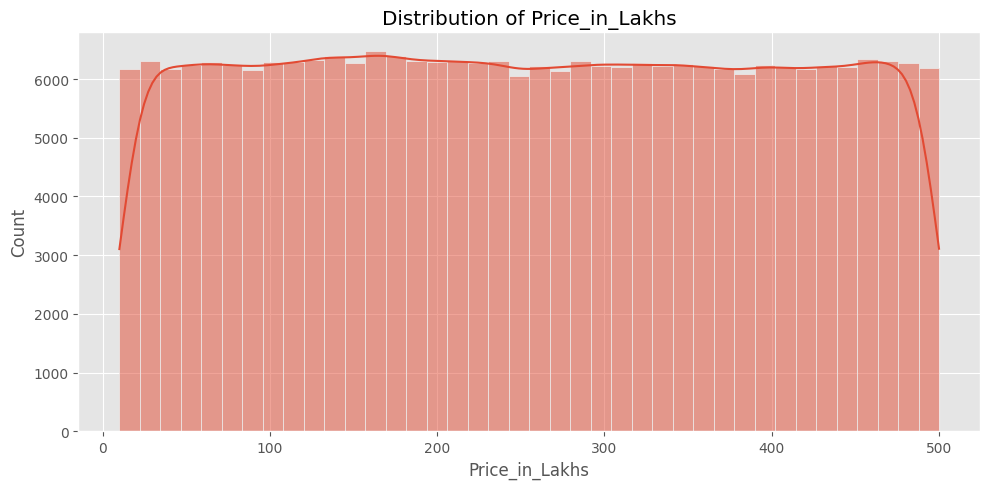

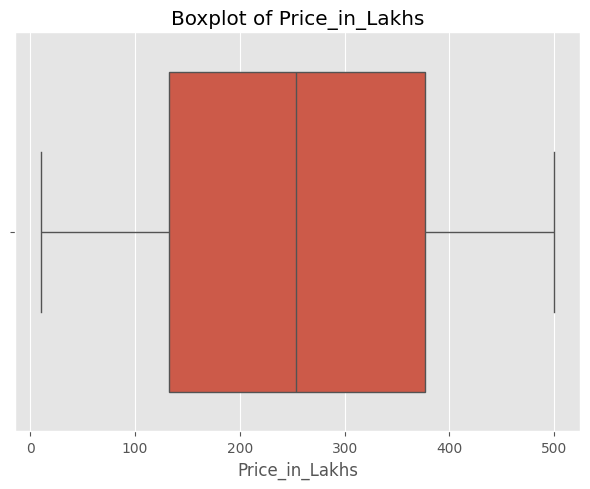

In [ ]:
# Try to detect a likely price column
possible_price_cols = [col for col in df_imputed.columns
                       if "price" in col.lower()]

print("Possible price columns:", possible_price_cols)

price_col = None
if possible_price_cols:
    # Prefer more specific name if exists
    for candidate in ["Price_in_Lakhs", "Price", "Price_per_SqFt"]:
        if candidate in df_imputed.columns:
            price_col = candidate
            break
    if price_col is None:
        price_col = possible_price_cols[0]

if price_col is not None:
    print(f"Using price column for distribution plots: {price_col}")

    plt.figure(figsize=(10, 5))
    sns.histplot(df_imputed[price_col], bins=40, kde=True)
    plt.title(f"Distribution of {price_col}")
    plt.xlabel(price_col)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.boxplot(x=df_imputed[price_col])
    plt.title(f"Boxplot of {price_col}")
    plt.tight_layout()
    plt.show()
else:
    print("No obvious price column found for distribution plots.")


Possible size/area columns: ['Size_in_SqFt', 'Price_per_SqFt']
Using size column 'Size_in_SqFt' and price column 'Price_in_Lakhs' for scatter plot.


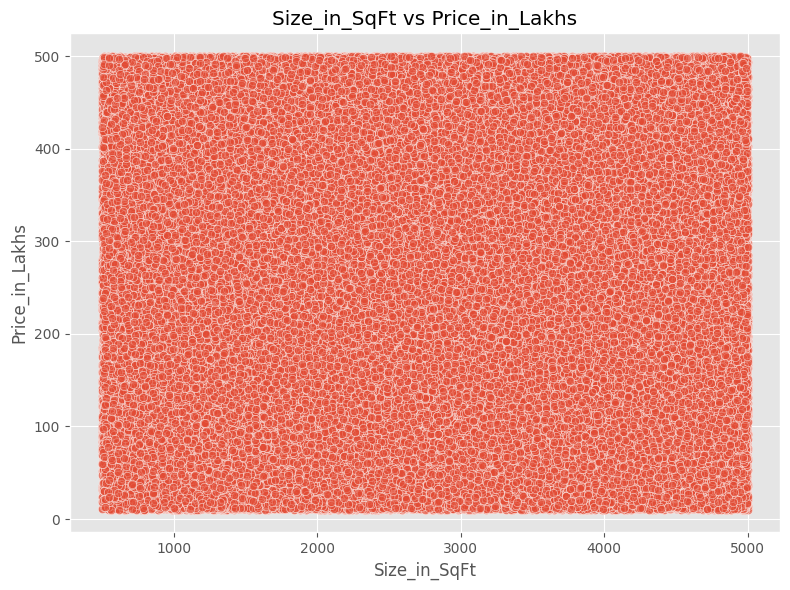

In [ ]:
# Try to detect size column
possible_size_cols = [col for col in df_imputed.columns
                      if "size" in col.lower() or "sqft" in col.lower()]

print("Possible size/area columns:", possible_size_cols)

size_col = None
if possible_size_cols:
    for candidate in ["Size_in_SqFt", "Area_in_SqFt", "Carpet_Area"]:
        if candidate in df_imputed.columns:
            size_col = candidate
            break
    if size_col is None:
        size_col = possible_size_cols[0]

if price_col is not None and size_col is not None:
    print(f"Using size column '{size_col}' and price column '{price_col}' for scatter plot.")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_imputed,
        x=size_col,
        y=price_col,
        alpha=0.6
    )
    plt.title(f"{size_col} vs {price_col}")
    plt.tight_layout()
    plt.show()
else:
    print("Could not find both size and price columns for scatter plot.")


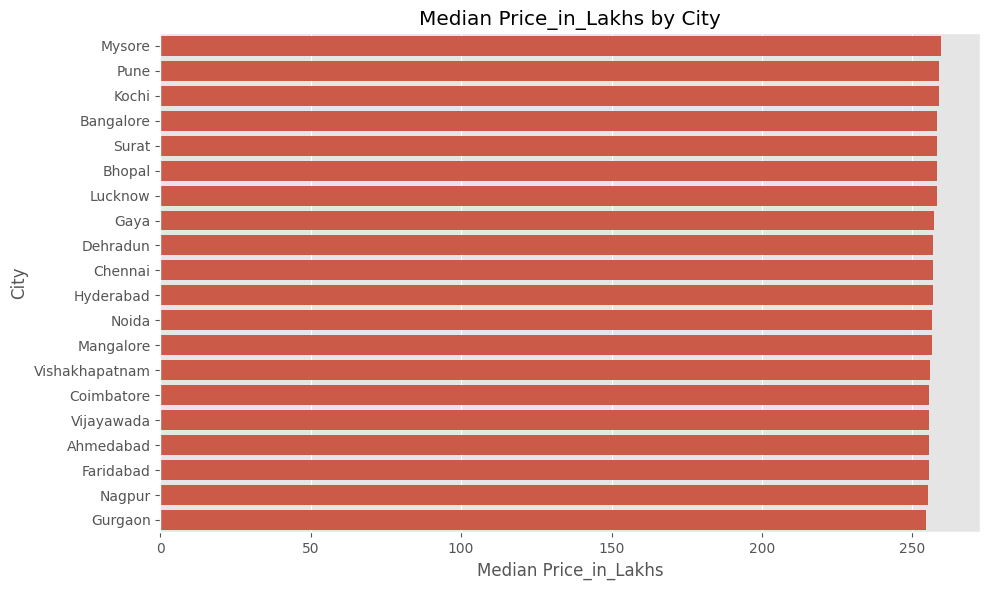

In [ ]:
city_col = None
for candidate in ["City", "city", "Location", "location"]:
    if candidate in df_imputed.columns:
        city_col = candidate
        break

if city_col and price_col:
    city_price = (
        df_imputed.groupby(city_col)[price_col]
        .median()
        .sort_values(ascending=False)
        .head(20)  # top 20 if many cities
    )

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=city_price.values,
        y=city_price.index,
        orient="h"
    )
    plt.xlabel(f"Median {price_col}")
    plt.ylabel(city_col)
    plt.title(f"Median {price_col} by {city_col}")
    plt.tight_layout()
    plt.show()
else:
    print("City/location or price column not found; skipping city-wise analysis.")


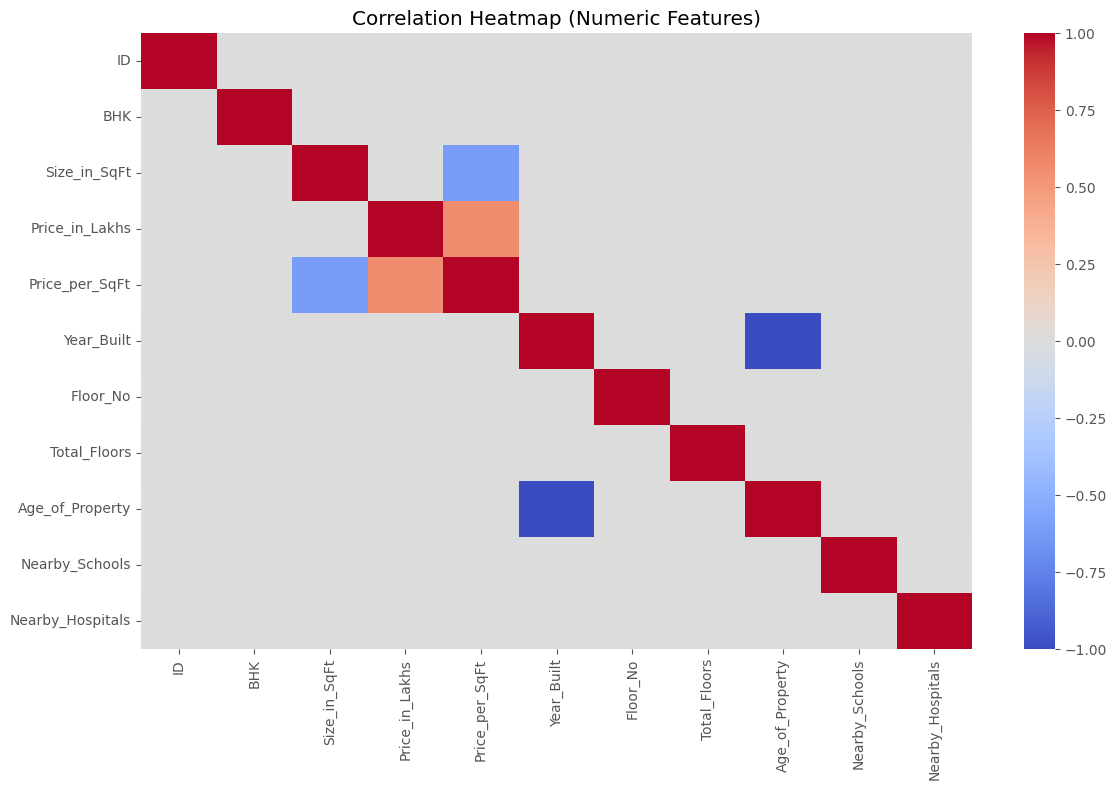

In [ ]:
corr = df_imputed.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=False,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


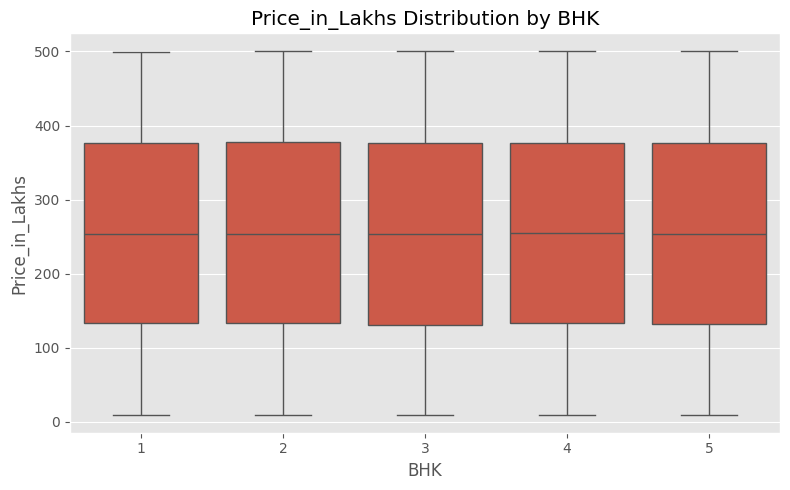

In [ ]:
bhk_col = None
for candidate in ["BHK", "bhk", "Bedrooms", "bedrooms"]:
    if candidate in df_imputed.columns:
        bhk_col = candidate
        break

if bhk_col and price_col:
    plt.figure(figsize=(8, 5))
    sns.boxplot(
        data=df_imputed,
        x=bhk_col,
        y=price_col
    )
    plt.title(f"{price_col} Distribution by {bhk_col}")
    plt.tight_layout()
    plt.show()
else:
    print("No BHK/bedroom or price column found; skipping BHK vs Price analysis.")


In [ ]:
# Tracking
%pip install mlflow
import os
from pathlib import Path
import json

import numpy as np
import pandas as pd

# ML
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

# Persistence
import joblib

# Tracking
import mlflow
import mlflow.sklearn

# Plotting (optional here, for diagnostics)
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.3f}")

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

print("Libraries imported successfully.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.5 MB/s eta 0:00:00
Libraries imported successfully.


In [ ]:
# Resolve paths
CURRENT_DIR = Path.cwd()
PROJECT_ROOT = CURRENT_DIR.parent if CURRENT_DIR.name == "notebooks" else CURRENT_DIR

DATA_PROCESSED_PATH = PROJECT_ROOT / "data" / "processed" / "housing_processed.csv"

ARTIFACTS_DIR = PROJECT_ROOT / "artifacts"
PREPROCESSING_DIR = ARTIFACTS_DIR / "preprocessing"
MODELS_DIR = ARTIFACTS_DIR / "models"
REPORTS_DIR = ARTIFACTS_DIR / "reports"

for d in [ARTIFACTS_DIR, PREPROCESSING_DIR, MODELS_DIR, REPORTS_DIR]:
    d.mkdir(parents=True, exist_ok=True)

MLFLOW_DIR = PROJECT_ROOT / "mlruns"

print("Project root:", PROJECT_ROOT)
print("Processed data:", DATA_PROCESSED_PATH)
print("Artifacts dir:", ARTIFACTS_DIR)

RANDOM_STATE = 42
TEST_SIZE = 0.2


Project root: /content
Processed data: /content/data/processed/housing_processed.csv
Artifacts dir: /content/artifacts


In [ ]:
# Configure MLflow tracking to local mlruns folder
mlflow.set_tracking_uri(MLFLOW_DIR.as_uri())

# You can have a single experiment or separate per task
CLASSIFICATION_EXPERIMENT_NAME = "RealEstate_GoodInvestment_Classification"
REGRESSION_EXPERIMENT_NAME = "RealEstate_FuturePrice_Regression"

mlflow.set_experiment(CLASSIFICATION_EXPERIMENT_NAME)
print("MLflow classification experiment set.")

# We will switch experiment for regression later in the notebook.


/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:177: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance.
  return FileStore(store_uri, store_uri)
2025/12/08 15:35:18 INFO mlflow.tracking.fluent: Experiment with name 'RealEstate_GoodInvestment_Classification' does not exist. Creating a new experiment.


MLflow classification experiment set.


In [ ]:
if not DATA_PROCESSED_PATH.exists():
    raise FileNotFoundError(f"Processed data not found at: {DATA_PROCESSED_PATH}")

df = pd.read_csv(DATA_PROCESSED_PATH)
print("Processed dataset loaded.")
print("Shape:", df.shape)

df.head()


Processed dataset loaded.
Shape: (250000, 23)


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.760,0.100,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.520,0.080,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.790,0.050,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.290,0.110,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.900,0.040,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")


Numeric columns (11): ['ID', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals']
Categorical columns (12): ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']


In [ ]:
def engineer_features(input_df: pd.DataFrame) -> pd.DataFrame:
    """
    Perform domain-specific feature engineering for real estate data.

    - Price_per_SqFt (if not present)
    - Amenity_Count (if 'Amenities' column exists)
    - Infra_Score (if Nearby_Schools & Nearby_Hospitals exist)
    - Age_of_Property (if Year_Built exists but Age_of_Property missing)

    Returns a new DataFrame with additional features.
    """
    df_fe = input_df.copy()

    # 1. Price_per_SqFt
    # Try to infer required columns
    if "Price_per_SqFt" not in df_fe.columns:
        price_col = None
        size_col = None

        for candidate in ["Price_in_Lakhs", "Price"]:
            if candidate in df_fe.columns:
                price_col = candidate
                break

        for candidate in ["Size_in_SqFt", "Area_in_SqFt", "Carpet_Area"]:
            if candidate in df_fe.columns:
                size_col = candidate
                break

        if price_col and size_col:
            # Avoid division by zero
            df_fe["Price_per_SqFt"] = df_fe[price_col] * 100000 / df_fe[size_col].replace(0, np.nan)
            print(f"Created Price_per_SqFt using {price_col} and {size_col}.")
        else:
            print("Price_per_SqFt not created (missing price or size column).")

    # 2. Amenity_Count
    if "Amenities" in df_fe.columns and "Amenity_Count" not in df_fe.columns:
        df_fe["Amenity_Count"] = (
            df_fe["Amenities"]
            .fillna("")
            .astype(str)
            .apply(lambda x: len([a for a in x.split(",") if a.strip() != ""]))
        )
        print("Created Amenity_Count from Amenities.")

    # 3. Infra_Score (average of nearby schools & hospitals)
    if {"Nearby_Schools", "Nearby_Hospitals"}.issubset(df_fe.columns) and "Infra_Score" not in df_fe.columns:
        df_fe["Infra_Score"] = (df_fe["Nearby_Schools"] + df_fe["Nearby_Hospitals"]) / 2.0
        print("Created Infra_Score from Nearby_Schools and Nearby_Hospitals.")

    # 4. Age_of_Property (if not already present) from Year_Built
    if "Age_of_Property" not in df_fe.columns and "Year_Built" in df_fe.columns:
        current_year = 2025  # adjust if needed; can be dynamic
        df_fe["Age_of_Property"] = current_year - df_fe["Year_Built"]
        print("Created Age_of_Property from Year_Built.")

    return df_fe


df_fe = engineer_features(df)
print("Feature engineering completed.")
df_fe.head()


Created Amenity_Count from Amenities.
Created Infra_Score from Nearby_Schools and Nearby_Hospitals.
Feature engineering completed.


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Amenity_Count,Infra_Score
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.760,0.100,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,5,6.500
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.520,0.080,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,5,4.500
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.790,0.050,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,4,8.500
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.290,0.110,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,5,6.000
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.900,0.040,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,5,6.500


In [ ]:
def compute_growth_rate(row, city_col: str = "City", property_type_col: str = "Property_Type"):
    """
    Determine annual growth rate based on city and/or property type.
    This is a simple rule-based approach for target creation.
    """
    # Default growth rates
    metro_cities = {"Mumbai", "Delhi", "New Delhi", "Bengaluru", "Bangalore", "Chennai", "Hyderabad", "Pune", "Kolkata"}
    tier2_cities = {"Jaipur", "Lucknow", "Surat", "Ahmedabad", "Chandigarh", "Indore", "Nagpur"}

    city = str(row.get(city_col, "")).strip()
    prop_type = str(row.get(property_type_col, "")).strip().lower()

    # Base rate by city type
    if city in metro_cities:
        base_rate = 0.09
    elif city in tier2_cities:
        base_rate = 0.075
    else:
        base_rate = 0.06

    # Adjust slightly by property type
    if "apartment" in prop_type or "flat" in prop_type:
        adj = 0.0
    elif "villa" in prop_type or "bungalow" in prop_type:
        adj = 0.005  # slightly higher for premium properties
    else:
        adj = 0.0

    return base_rate + adj


def engineer_targets(input_df: pd.DataFrame) -> pd.DataFrame:
    """
    Create:
      - Future_Price_5Y (regression target)
      - Good_Investment (classification target)

    Uses:
      - Price column (Price_in_Lakhs or similar)
      - Price_per_SqFt
      - City
      - BHK, Availability_Status, Parking_Space, Security, Nearby_Schools, Nearby_Hospitals (if available)
    """
    df_tgt = input_df.copy()

    # --- Regression Target: Future_Price_5Y ---
    price_col = None
    for candidate in ["Price_in_Lakhs", "Price"]:
        if candidate in df_tgt.columns:
            price_col = candidate
            break

    if price_col is None:
        raise ValueError("No price column found to compute Future_Price_5Y target.")

    # Compute annual growth rates for each row
    df_tgt["Annual_Growth_Rate"] = df_tgt.apply(compute_growth_rate, axis=1)

    years = 5
    df_tgt["Future_Price_5Y"] = df_tgt[price_col] * (1 + df_tgt["Annual_Growth_Rate"]) ** years
    print("Created regression target Future_Price_5Y.")

    # --- Classification Target: Good_Investment ---
    # Strategy:
    #   1. Compare Price_per_SqFt to city median (undervalued if <= 0.9 * median)
    #   2. Add a score based on BHK, readiness, parking, security, infra
    #   3. Good_Investment = 1 if undervalued and score >= threshold

    # Ensure Price_per_SqFt exists (feature engineering should have done this)
    if "Price_per_SqFt" not in df_tgt.columns:
        raise ValueError("Price_per_SqFt required for Good_Investment but not found.")

    # City column (fallback to Location if City missing)
    city_col = None
    for candidate in ["City", "city", "Location", "location"]:
        if candidate in df_tgt.columns:
            city_col = candidate
            break

    if city_col:
        city_median = df_tgt.groupby(city_col)["Price_per_SqFt"].transform("median")
        df_tgt["Undervalued"] = df_tgt["Price_per_SqFt"] <= 0.9 * city_median
    else:
        # Global median fallback
        global_median = df_tgt["Price_per_SqFt"].median()
        df_tgt["Undervalued"] = df_tgt["Price_per_SqFt"] <= 0.9 * global_median

    # Multi-factor investment score
    score = np.zeros(len(df_tgt), dtype=int)

    # BHK >= 3
    for bhk_col in ["BHK", "Bedrooms", "bedrooms"]:
        if bhk_col in df_tgt.columns:
            score += (df_tgt[bhk_col] >= 3).astype(int)
            break

    # Ready to move
    for avail_col in ["Availability_Status", "Status"]:
        if avail_col in df_tgt.columns:
            score += df_tgt[avail_col].astype(str).str.lower().str.contains("ready").astype(int)
            break

    # Parking available
    for park_col in ["Parking_Space", "Parking"]:
        if park_col in df_tgt.columns:
            score += df_tgt[park_col].astype(str).str.lower().isin(["yes", "available", "covered"]).astype(int)
            break

    # Security available
    if "Security" in df_tgt.columns:
        score += df_tgt["Security"].astype(str).str.lower().isin(["yes", "gated", "guarded"]).astype(int)

    # Infra_Score as proxy for good neighborhood
    if "Infra_Score" in df_tgt.columns:
        median_infra = df_tgt["Infra_Score"].median()
        score += (df_tgt["Infra_Score"] >= median_infra).astype(int)

    df_tgt["Investment_Score"] = score

    # Final label
    df_tgt["Good_Investment"] = ((df_tgt["Undervalued"]) & (df_tgt["Investment_Score"] >= 2)).astype(int)

    print("Created classification target Good_Investment.")

    return df_tgt


df_model = engineer_targets(df_fe)
print("Target engineering completed.")
df_model[["Future_Price_5Y", "Good_Investment", "Annual_Growth_Rate", "Investment_Score"]].head()


Created regression target Future_Price_5Y.
Created classification target Good_Investment.
Target engineering completed.


,Future_Price_5Y,Good_Investment,Annual_Growth_Rate,Investment_Score
0,753.556,0,0.090,2
1,300.832,1,0.090,2
2,245.952,1,0.060,3
3,401.856,0,0.060,4
4,268.740,1,0.080,4


In [ ]:
enhanced_path = PROJECT_ROOT / "data" / "processed" / "housing_with_targets.csv"
df_model.to_csv(enhanced_path, index=False)
print(f"Enhanced dataset with features and targets saved to: {enhanced_path}")


Enhanced dataset with features and targets saved to: /content/data/processed/housing_with_targets.csv


In [ ]:
# Targets
cls_target_col = "Good_Investment"
reg_target_col = "Future_Price_5Y"

if cls_target_col not in df_model.columns:
    raise ValueError(f"Classification target '{cls_target_col}' not found in df_model.")
if reg_target_col not in df_model.columns:
    raise ValueError(f"Regression target '{reg_target_col}' not found in df_model.")

# Drop technical columns from features
drop_cols = {
    cls_target_col,
    reg_target_col,
    "Annual_Growth_Rate",
    "Undervalued",
    "Investment_Score",
}

feature_cols = [c for c in df_model.columns if c not in drop_cols]

X = df_model[feature_cols].copy()
y_cls = df_model[cls_target_col].astype(int)
y_reg = df_model[reg_target_col].astype(float)

print("Feature columns used for modeling:", len(feature_cols))
feature_cols[:20]


Feature columns used for modeling: 25


['ID',
 'State',
 'City',
 'Locality',
 'Property_Type',
 'BHK',
 'Size_in_SqFt',
 'Price_in_Lakhs',
 'Price_per_SqFt',
 'Year_Built',
 'Furnished_Status',
 'Floor_No',
 'Total_Floors',
 'Age_of_Property',
 'Nearby_Schools',
 'Nearby_Hospitals',
 'Public_Transport_Accessibility',
 'Parking_Space',
 'Security',
 'Amenities']

In [ ]:
X_train, X_test, y_cls_train, y_cls_test, y_reg_train, y_reg_test = train_test_split(
    X, y_cls, y_reg, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_cls
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Positive rate in train:", y_cls_train.mean())
print("Positive rate in test:", y_cls_test.mean())


Train shape: (200000, 25)
Test shape: (50000, 25)
Positive rate in train: 0.38985
Positive rate in test: 0.38986


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

print(f"Numeric features ({len(num_cols)}): {num_cols}")
print(f"Categorical features ({len(cat_cols)}): {cat_cols}")

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# IMPORTANT CHANGE: keep it sparse (default) to save memory
categorical_transformer = OneHotEncoder(
    handle_unknown="ignore"  # sparse=True by default
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    # let it return sparse if any transformer is sparse (default behavior)
)

# Fit preprocessor once on training data
preprocessor.fit(X_train)

print("Preprocessor fitted on training data.")


Numeric features (13): ['ID', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Amenity_Count', 'Infra_Score']
Categorical features (12): ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']
Preprocessor fitted on training data.


In [ ]:
preprocessor_path = PREPROCESSING_DIR / "preprocessor.pkl"
joblib.dump(preprocessor, preprocessor_path)
print(f"Preprocessor saved to: {preprocessor_path}")

metadata = {
    "numeric_features": num_cols,
    "categorical_features": cat_cols,
    "feature_columns_all": feature_cols,
}

metadata_path = PREPROCESSING_DIR / "feature_metadata.json"
with open(metadata_path, "w") as f:
    json.dump(metadata, f, indent=2)

print(f"Feature metadata saved to: {metadata_path}")


Preprocessor saved to: /content/artifacts/preprocessing/preprocessor.pkl
Feature metadata saved to: /content/artifacts/preprocessing/feature_metadata.json


In [ ]:
def evaluate_classification(y_true, y_pred, y_proba=None, verbose=True):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    metrics = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
    }

    if y_proba is not None:
        try:
            auc = roc_auc_score(y_true, y_proba)
        except ValueError:
            auc = np.nan
        metrics["roc_auc"] = auc

    if verbose:
        print("Classification Metrics:")
        for k, v in metrics.items():
            print(f"  {k}: {v:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, zero_division=0))

    return metrics


In [ ]:
def evaluate_regression(y_true, y_pred, verbose=True):
    """
    Compute regression metrics in a version-safe way (no reliance on
    'squared' argument for mean_squared_error, so it works with older
    scikit-learn versions as well).
    """
    mae = mean_absolute_error(y_true, y_pred)

    # Older sklearn versions don't support squared=False
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    r2 = r2_score(y_true, y_pred)

    metrics = {
        "mae": mae,
        "rmse": rmse,
        "r2": r2,
    }

    if verbose:
        print("Regression Metrics:")
        print(f"  MAE : {mae:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R²  : {r2:.4f}")

    return metrics


In [ ]:
mlflow.set_experiment(CLASSIFICATION_EXPERIMENT_NAME)

classification_results = []

models_cls = {
    "log_reg": LogisticRegression(
        max_iter=1000,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ),
    "rf_classifier": RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ),
}

for model_name, model in models_cls.items():
    print(f"\n=== Training classification model: {model_name} ===")

    with mlflow.start_run(run_name=model_name):
        # Build pipeline: preprocessor + model
        clf_pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("model", model),
        ])

        # Fit
        clf_pipeline.fit(X_train, y_cls_train)

        # Predict
        y_pred = clf_pipeline.predict(X_test)

        # Probabilities (if supported)
        try:
            y_proba = clf_pipeline.predict_proba(X_test)[:, 1]
        except AttributeError:
            y_proba = None

        # Evaluate
        metrics = evaluate_classification(y_cls_test, y_pred, y_proba, verbose=True)

        # Log params and metrics
        mlflow.log_param("model_name", model_name)
        mlflow.log_params(model.get_params())
        mlflow.log_metrics(metrics)

        # Log model
        mlflow.sklearn.log_model(
            sk_model=clf_pipeline,
            artifact_path="model",
            registered_model_name=None
        )

        # Store run info locally to choose best model later
        run_id = mlflow.active_run().info.run_id
        metrics["run_id"] = run_id
        metrics["model_name"] = model_name
        classification_results.append(metrics)

classification_results



=== Training classification model: log_reg ===


2025/12/08 15:35:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Classification Metrics:
  accuracy: 0.8966
  precision: 0.8640
  recall: 0.8720
  f1: 0.8679
  roc_auc: 0.9667

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     30507
           1       0.86      0.87      0.87     19493

    accuracy                           0.90     50000
   macro avg       0.89      0.89      0.89     50000
weighted avg       0.90      0.90      0.90     50000


=== Training classification model: rf_classifier ===


2025/12/08 15:43:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Classification Metrics:
  accuracy: 0.9985
  precision: 1.0000
  recall: 0.9962
  f1: 0.9981
  roc_auc: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30507
           1       1.00      1.00      1.00     19493

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



[{'accuracy': 0.89656,
  'precision': 0.8639760077263254,
  'recall': 0.8719540347817165,
  'f1': 0.8679466884542716,
  'roc_auc': np.float64(0.9667246341594575),
  'run_id': '1863f62815f542669167bf5e484d3fda',
  'model_name': 'log_reg'},
 {'accuracy': 0.99852,
  'precision': 1.0,
  'recall': 0.9962037654542656,
  'f1': 0.9980982730263158,
  'roc_auc': np.float64(0.9999440532818181),
  'run_id': '93e8284ad625401489455603e9da6fda',
  'model_name': 'rf_classifier'}]

In [ ]:
# Choose best model by F1 score (or another metric if you prefer)
cls_df = pd.DataFrame(classification_results)
best_cls_idx = cls_df["f1"].idxmax()
best_cls_row = cls_df.iloc[best_cls_idx]

best_cls_name = best_cls_row["model_name"]
best_cls_run_id = best_cls_row["run_id"]

print("Best classification model:", best_cls_name)
print("Best run_id:", best_cls_run_id)
print("Metrics:")
display(best_cls_row)

# Refit best model on ALL data (X, y_cls) for deployment
best_cls_model = models_cls[best_cls_name]

best_cls_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", best_cls_model),
])

best_cls_pipeline.fit(X, y_cls)

cls_model_path = MODELS_DIR / "classifier_good_investment.pkl"
joblib.dump(best_cls_pipeline, cls_model_path)
print(f"Best classification pipeline saved to: {cls_model_path}")


Best classification model: rf_classifier
Best run_id: 93e8284ad625401489455603e9da6fda
Metrics:


,1
accuracy,0.999
precision,1.000
recall,0.996
f1,0.998
roc_auc,1.000
run_id,93e8284ad625401489455603e9da6fda
model_name,rf_classifier


Best classification pipeline saved to: /content/artifacts/models/classifier_good_investment.pkl


In [ ]:
# Faster regression training with optional subsampling for heavy models
mlflow.set_experiment(REGRESSION_EXPERIMENT_NAME)

regression_results = []

# ---- Optional: subsample training data for heavy models like RandomForest ----
MAX_TRAIN_SAMPLES_RF = 50000  # adjust if needed

X_train_rf = X_train
y_reg_train_rf = y_reg_train

if len(X_train) > MAX_TRAIN_SAMPLES_RF:
    sample_idx = X_train.sample(
        n=MAX_TRAIN_SAMPLES_RF,
        random_state=RANDOM_STATE
    ).index
    X_train_rf = X_train.loc[sample_idx]
    y_reg_train_rf = y_reg_train.loc[sample_idx]

    print(
        f"Using subsample for RandomForest: "
        f"{len(X_train_rf)} rows (out of {len(X_train)})"
    )
else:
    print(f"Training RandomForest on full training set: {len(X_train)} rows")

# ---- Define models: light one + heavier one ----
models_reg = {
    # Very fast baseline
    "lin_reg": {
        "model": LinearRegression(),
        "X_train": X_train,
        "y_train": y_reg_train,
    },
    # Heavier model but trained on subsample + smaller RF
    "rf_regressor": {
        "model": RandomForestRegressor(
            n_estimators=100,      # was 300 → faster
            max_depth=15,          # limit depth → faster and less overfitting
            min_samples_leaf=5,    # slightly regularized
            random_state=RANDOM_STATE,
            n_jobs=-1,
        ),
        "X_train": X_train_rf,
        "y_train": y_reg_train_rf,
    },
}

for model_name, cfg in models_reg.items():
    print(f"\n=== Training regression model: {model_name} ===")

    model = cfg["model"]
    X_tr = cfg["X_train"]
    y_tr = cfg["y_train"]

    with mlflow.start_run(run_name=model_name):
        reg_pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("model", model),
        ])

        # Fit on (possibly) subsampled training data
        reg_pipeline.fit(X_tr, y_tr)

        # Always evaluate on full X_test / y_reg_test
        y_pred = reg_pipeline.predict(X_test)

        # Evaluate
        metrics = evaluate_regression(y_reg_test, y_pred, verbose=True)

        # Log params and metrics
        mlflow.log_param("model_name", model_name)
        mlflow.log_params(model.get_params())
        mlflow.log_metrics(metrics)

        # Log model
        mlflow.sklearn.log_model(
            sk_model=reg_pipeline,
            artifact_path="model",
            registered_model_name=None,
        )

        run_id = mlflow.active_run().info.run_id
        metrics["run_id"] = run_id
        metrics["model_name"] = model_name
        regression_results.append(metrics)

regression_results


2025/12/08 15:54:56 INFO mlflow.tracking.fluent: Experiment with name 'RealEstate_FuturePrice_Regression' does not exist. Creating a new experiment.


Using subsample for RandomForest: 50000 rows (out of 200000)

=== Training regression model: lin_reg ===


2025/12/08 15:55:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Regression Metrics:
  MAE : 7.6652
  RMSE: 10.7615
  R²  : 0.9971

=== Training regression model: rf_regressor ===


2025/12/08 16:00:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Regression Metrics:
  MAE : 3.2949
  RMSE: 4.6381
  R²  : 0.9995


[{'mae': 7.665209629998789,
  'rmse': np.float64(10.7614710845744),
  'r2': 0.9970594452441133,
  'run_id': '0a5867364b184db7a91a9d0dc46400ae',
  'model_name': 'lin_reg'},
 {'mae': 3.294875701050862,
  'rmse': np.float64(4.638077917525619),
  'r2': 0.9994537869585508,
  'run_id': '3b1d9dc0168d442585e9539601bbbd43',
  'model_name': 'rf_regressor'}]

In [ ]:
reg_df = pd.DataFrame(regression_results)

# For regression, select best by RMSE (lower is better)
best_reg_idx = reg_df["rmse"].idxmin()
best_reg_row = reg_df.iloc[best_reg_idx]

best_reg_name = best_reg_row["model_name"]
best_reg_run_id = best_reg_row["run_id"]

print("Best regression model:", best_reg_name)
print("Best run_id:", best_reg_run_id)
print("Metrics:")
display(best_reg_row)

# Refit best model on ALL data (X, y_reg)
best_reg_model_cfg = models_reg[best_reg_name]
best_reg_model_obj = best_reg_model_cfg["model"]

best_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", best_reg_model_obj),
])

best_reg_pipeline.fit(X, y_reg)

reg_model_path = MODELS_DIR / "regressor_future_price_5y.pkl"
joblib.dump(best_reg_pipeline, reg_model_path)
print(f"Best regression pipeline saved to: {reg_model_path}")

Best regression model: rf_regressor
Best run_id: 3b1d9dc0168d442585e9539601bbbd43
Metrics:


,1
mae,3.295
rmse,4.638
r2,0.999
run_id,3b1d9dc0168d442585e9539601bbbd43
model_name,rf_regressor


Best regression pipeline saved to: /content/artifacts/models/regressor_future_price_5y.pkl


In [ ]:
def get_tree_feature_importances(pipeline: Pipeline, numeric_features, categorical_features):
    """
    Extract feature importances from a tree-based model inside a Pipeline that uses
    a ColumnTransformer + OneHotEncoder.
    """
    model = pipeline.named_steps["model"]
    preproc = pipeline.named_steps["preprocessor"]

    if not hasattr(model, "feature_importances_"):
        print("Model does not support feature_importances_")
        return None

    # Get feature names from ColumnTransformer
    # The 'cat' transformer is directly an OneHotEncoder, not a Pipeline containing it.
    ohe = preproc.named_transformers_["cat"]
    cat_feature_names = ohe.get_feature_names_out(categorical_features)

    all_feature_names = np.concatenate([numeric_features, cat_feature_names])

    importances = model.feature_importances_

    fi_df = pd.DataFrame({
        "feature": all_feature_names,
        "importance": importances
    }).sort_values("importance", ascending=False)

    return fi_df

# Example: feature importance for best RF models (if they are RF)
if isinstance(best_cls_model, RandomForestClassifier):
    fi_cls = get_tree_feature_importances(best_cls_pipeline, num_cols, cat_cols)
    print("Top 10 important features for classification:")
    display(fi_cls.head(10))

# Corrected: use best_reg_model_obj instead of best_reg_model
if isinstance(best_reg_model_obj, RandomForestRegressor):
    fi_reg = get_tree_feature_importances(best_reg_pipeline, num_cols, cat_cols)
    print("Top 10 important features for regression:")
    display(fi_reg.head(10))

Top 10 important features for classification:


,feature,importance
4,Price_per_SqFt,0.475
3,Price_in_Lakhs,0.171
2,Size_in_SqFt,0.082
1,BHK,0.036
12,Infra_Score,0.023
921,Availability_Status_Under_Construction,0.015
587,Security_Yes,0.014
920,Availability_Status_Ready_to_Move,0.014
586,Security_No,0.014
584,Parking_Space_No,0.014


Top 10 important features for regression:


,feature,importance
3,Price_in_Lakhs,0.988
24,State_Maharashtra,0.002
50,City_Hyderabad,0.002
56,City_Kolkata,0.002
63,City_New Delhi,0.002
39,City_Chennai,0.002
35,City_Bangalore,0.001
18,State_Gujarat,0.001
57,City_Lucknow,0.000
51,City_Indore,0.000


from matplotlib import pyplot as plt
_df_0['importance'].plot(kind='hist', bins=20, title='importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['importance'].plot(kind='line', figsize=(8, 4), title='importance')
plt.gca().spines[['top', 'right']].set_visible(False)